In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lets create synthetic data point
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
x

array([[-1.86222295,  0.44526241],
       [-0.3322389 ,  0.81148533],
       [ 0.76395881,  0.11053045],
       ...,
       [-0.92391033,  0.35520586],
       [ 0.01666745,  0.69008246],
       [-1.16427466,  2.00748145]])

In [5]:
y

array([-1.26655357e+02,  1.87089480e+01,  6.17738648e+01,  4.03210454e+01,
        1.58666548e+02,  4.71947911e+01,  1.95159967e+01, -4.74163610e+01,
       -5.43648792e+01, -1.10584471e+02,  2.29508135e+01,  8.43827973e+01,
       -4.86983836e+01,  2.29457752e+02, -4.51507677e+01, -2.24171565e+00,
       -2.89538715e+01,  6.86134372e+01,  1.52133702e+02,  5.49657932e+01,
       -6.68342797e+01, -3.48973389e+01,  2.40219018e+01,  6.83843335e+01,
        9.15297956e+00,  8.34565111e+01,  7.94593170e+01,  3.98143569e+01,
        1.84034012e+01, -3.92201447e+00,  1.07426584e+02, -4.20664724e+01,
       -1.86484692e+02, -2.95451733e+02, -1.37709266e+02, -5.13797109e+01,
        9.25305053e+01, -1.34038375e+02, -2.94182251e+01,  4.38537226e+01,
        6.67047137e+00,  5.04335580e+01, -1.39323334e+01,  1.25271525e+02,
       -7.91929627e+01, -1.06056263e+02,  7.84407176e+01,  4.06643262e+01,
        2.72880177e-01, -8.32538669e+00,  6.15351034e+01, -1.76702685e+01,
       -4.72034566e+01, -

In [6]:
pd.DataFrame(x)[0]

0     -1.862223
1     -0.332239
2      0.763959
3      1.471309
4      0.906436
         ...   
995   -1.615993
996   -0.197529
997   -0.923910
998    0.016667
999   -1.164275
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

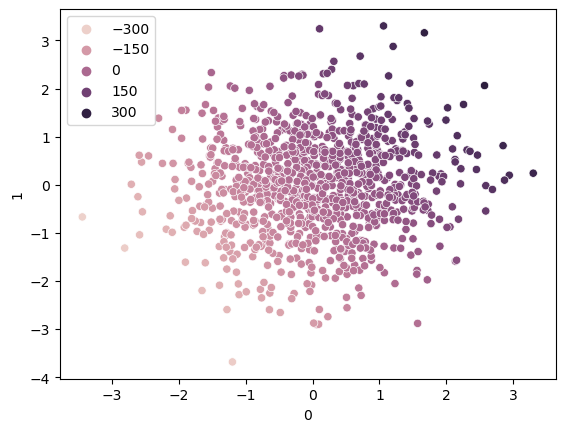

In [7]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[78.62143298, 52.78805742]])

In [13]:
# Prediction
y_pred=svr.predict(x_test)

In [14]:
y_pred

array([ 4.79160746e+01, -2.87525998e+01,  1.34216273e+02, -5.75424056e+01,
        3.71424273e+01,  1.13816961e+02, -6.12423992e+01, -2.89822314e+01,
        8.45243920e+01,  6.91786596e+00, -2.83477494e+01,  3.66086504e+01,
       -4.04050213e-01,  3.47423675e+01, -4.69276169e+01, -3.41929862e+01,
        4.96316807e+01,  6.15446464e+01, -3.53126515e+01,  1.88780333e+01,
       -1.75882422e+01, -2.55722699e+01, -3.97878447e+00,  1.87114534e+01,
       -5.50626985e+01, -3.38346883e+01,  2.03597656e+02,  2.84181574e+01,
        3.00526210e+01, -2.48430052e+01,  9.92791472e-01,  4.38099377e+01,
        1.25524366e+01, -1.34791264e+02, -5.46018945e+01, -1.41510282e+02,
       -3.17101403e+01,  7.67086460e+01,  1.17459414e+02, -3.77321616e+01,
        7.28568617e+01, -7.75006178e+01, -5.17590915e+01, -3.33213140e+01,
        1.36857822e+02,  8.23077695e+01, -1.60427295e+02,  5.24921722e+01,
        2.59205480e+01, -1.76407456e+01,  4.09086302e+01, -2.21138607e+02,
        2.88020297e+01,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9989508638967254


# Hyperparameter Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['linear'],
             'epsilon':[0.1,0.2,0.3]}

In [18]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.757 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.761 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.751 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.757 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.761 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.765 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.751 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
# Prediction
y_pred4=grid.predict(x_test)
print(r2_score(y_test,y_pred4))

0.9989772154142821
